# Twitter Data Cleaning Script

#### Import necessary packages for data cleaning and visualization

In [1]:
import pandas as pd
import numpy as np
import nltk
import advertools as adv
import text2emotion as te
import matplotlib.pyplot as plt
from textblob import TextBlob
from normalizer import preprocess
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Casey Gwen
[nltk_data]     Dable\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Casey Gwen
[nltk_data]     Dable\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Casey Gwen
[nltk_data]     Dable\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## PREPROCESSING

In [39]:
data = pd.read_csv('./wjsn.csv', engine='python')

#### *Filter only english tweets from collected data

In [40]:
english_only = data.loc[data['lang'] == 'en']

In [41]:
text_data = english_only['text'].to_numpy()

#### Process tweets using the normalizer.py for cleaning

In [42]:
preprocessed_text_data = [preprocess(text) for text in text_data]

#### Removing duplicates

In [43]:
tweet_documents = np.unique([" ".join(sent) for sent in preprocessed_text_data])

###### from here a certain feature should be selected to get your desired results

## PLOTTING TWEETS OVER TIME

In [3]:
retweeted_data_time = data
retweeted_data_time.rename(columns={'created_at': 'date'}, inplace=True)
retweeted_data_time = retweeted_data_time[['date']]
retweeted_data_time = retweeted_data_time.assign(count=1) #count added to know how many tweets are made over time
retweeted_data_time = retweeted_data_time.set_index('date')

In [4]:
retweeted_data_time.index = pd.to_datetime(retweeted_data_time.index) #change the datatype of the data frame item from str to datetime data type 

In [5]:
retweeted_data_time = retweeted_data_time['count'].resample('5T').sum()
plot_time = retweeted_data_time

In [6]:
pd.DataFrame(plot_time).to_csv('wjsn_tweet_count.csv')

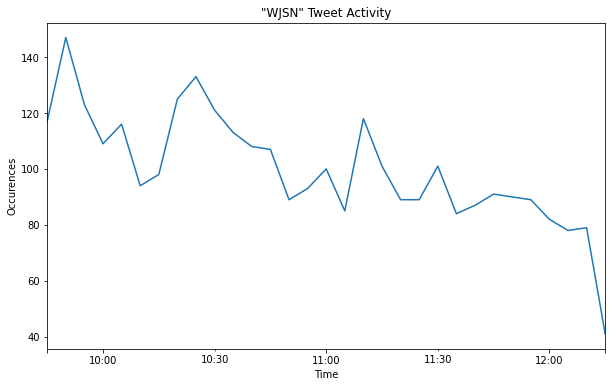

In [7]:
retweeted_data_time = retweeted_data_time\
.plot(ylabel='Occurences', xlabel='Time', title='"WJSN" Tweet Activity', figsize=(10, 6)); #resampling needed for method frequency conversion

In [8]:
tweet_activity_plot = retweeted_data_time;
tweet_activity_plot = tweet_activity_plot.get_figure()
tweet_activity_plot.savefig('wjsn_plot.jpg', dpi=100)

## RETWEETS

In [11]:
retweeted_data = data
retweeted_data.rename(columns={'public_metrics.retweet_count': 'retweets', 'public_metrics.like_count': 'likes', 
                               'lang': 'language'}, inplace=True)
retweeted_data = retweeted_data[['text', 'retweets','likes','language']]

In [12]:
retweeted_data = retweeted_data[["text", "retweets", "likes", "language"]]
retweeted_data.sort_values("retweets", inplace = True, ascending = False)
retweeted_data

,text,retweets,likes,language
3096,[#퀸덤2/6회 예고] 각 팀의 자존심을 건 3차 경연 1R 〈유닛 대결〉의 시작!...,6926,19831,ko
2980,[#퀸덤2/6회 예고] 각 팀의 자존심을 건 3차 경연 1R 〈유닛 대결〉의 시작!...,6926,19830,ko
2963,[#퀸덤2/6회 예고] 각 팀의 자존심을 건 3차 경연 1R 〈유닛 대결〉의 시작!...,6926,19830,ko
2964,[#퀸덤2/6회 예고] 각 팀의 자존심을 건 3차 경연 1R 〈유닛 대결〉의 시작!...,6926,19830,ko
2966,[#퀸덤2/6회 예고] 각 팀의 자존심을 건 3차 경연 1R 〈유닛 대결〉의 시작!...,6926,19830,ko
...,...,...,...,...
1349,wts lfb ph\n\nwjsn eunseo photocard\n\n380 + p...,0,0,en
1040,#WuXuanYi ❤️❤️❤️\n#wuxuanyi #bettywu #singer #...,0,1,und
2033,@starfess TWICE : momo\nGFRIEND : sinb\nRED VE...,0,0,en
394,Wjsn China queens!!!! https://t.co/fWFlGaUG6C,0,2,en


In [13]:
retweeted_data = retweeted_data[["text", "retweets", "likes", "language"]]
retweeted_data.sort_values("retweets", inplace = True, ascending = False)
retweeted_data.drop_duplicates(subset ="retweets", keep = 'first', inplace = True)

##### English only retweets

In [14]:
english_only_rt_data = retweeted_data.query("language == 'en'")
english_only_rt_data = english_only_rt_data[["retweets", "likes","language"]]
english_only_rt_data

,retweets,likes,language
1630,2964,11517,en
198,2154,7725,en
1658,2140,9067,en
185,2009,9451,en
375,1401,5151,en
...,...,...,...
360,10,35,en
1497,8,79,en
336,4,4,en
1213,2,3,en


##### Non-english retweets

In [15]:
retweeted_data = retweeted_data[["retweets", "likes","language"]]
retweeted_data

,retweets,likes,language
3096,6926,19831,ko
2859,6925,19830,ko
2481,6924,19827,ko
2361,6923,19825,ko
1631,6922,19820,ko
...,...,...,...
336,4,4,en
470,3,12,th
1213,2,3,en
769,1,0,ko


In [16]:
df_retweeted_count = pd.DataFrame(retweeted_data).to_csv('wjsn_retweetCount-non_english.csv', header=['Retweets', 'Likes', 'Language'])

In [17]:
df_retweeted_count_en = pd.DataFrame(english_only_rt_data).to_csv('wjsn_retweetCount-english.csv', header=['Retweets', 'Likes', 'Language'])

## EMOJI ABSENCE PRESENCE

In [21]:
emojis_in_tweet = adv.extract_emoji(text_data)
emoji_for_binarizer = emojis_in_tweet['emoji_counts']
df_emoji_count = pd.DataFrame(emojis_in_tweet['emoji_counts'])

In [22]:
df_emoji_count = pd.DataFrame(df_emoji_count).to_csv('wjsn_emojiCount.csv', header=['Emoji Count'])

#### Binarizer

In [23]:
for i, x in enumerate(emoji_for_binarizer):
    if x >= 1: emoji_for_binarizer[i] = 1

In [24]:
df_emoji_binarized = pd.DataFrame(emoji_for_binarizer)
df_emoji_binarized.columns = ['Emoji Absence/Presence']

In [25]:
emoji_percentage = df_emoji_binarized['Emoji Absence/Presence'].value_counts(normalize=True) * 100

In [26]:
emoji_percentage

0    72.944297
1    27.055703
Name: Emoji Absence/Presence, dtype: float64

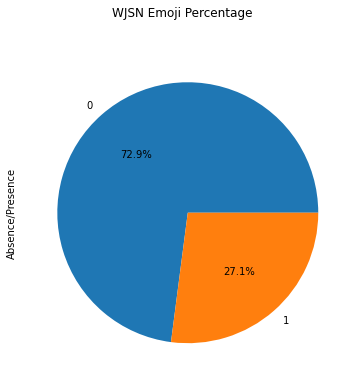

In [27]:
emoji_plot = emoji_percentage.plot.pie(ylabel='Absence/Presence', title='WJSN Emoji Percentage', legend=None,subplots=True, figsize=(6, 6), autopct='%1.1f%%')

In [28]:
emoji_plot = emoji_plot[0].get_figure()
emoji_plot.savefig('wjsn_emoji_plot.jpg', dpi=100)

In [29]:
pd.DataFrame(df_emoji_binarized).to_csv('wjsn_emojiCountBinarized.csv', header=['Emoji Absence/Presence'])

## MOST COMMON WORDS

In [34]:
joined_words = sum(preprocessed_text_data, [])
c = Counter(joined_words)

In [35]:
df_most_common_words = pd.DataFrame(c.most_common())

In [36]:
pd.DataFrame(df_most_common_words).to_csv('wjsn_MCW.csv', header=['Tweets','Occurences'])

In [37]:
df_most_common_words.columns = ['Words', 'Occurence']
df_most_common_words = df_most_common_words.head(20)
df_most_common_words = df_most_common_words.set_index('Words')
df_most_common_words

,Occurence
Words,
wjsn,885
girl,162
eunseo,135
seola,129
exy,119
twice,110
red,107
velvet,107
blackpink,104


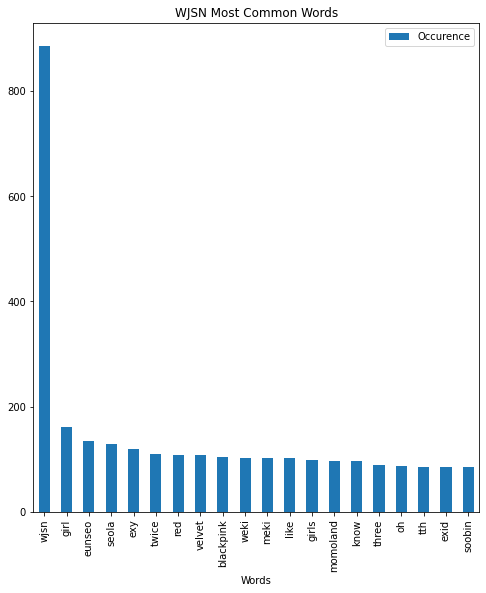

In [38]:
mcw_plot = df_most_common_words.plot.bar(title="WJSN Most Common Words",figsize=(8, 9));
mcw_plot = mcw_plot.get_figure()
mcw_plot.savefig('wjsn_mcw_plot.jpg', dpi=100)

## TF-IDF

In [44]:
vectorizer = TfidfVectorizer(min_df = 2)
X = vectorizer.fit_transform(tweet_documents)

In [45]:
feature_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [46]:
pd.DataFrame(feature_tfidf).to_csv('wjsn - tfidf.csv')

In [47]:
feature_tfidf_transposed = feature_tfidf.T
feature_tfidf_transposed = feature_tfidf_transposed.sum(axis=1)
sorted_feature = feature_tfidf_transposed.sort_values(ascending=False)
sorted_feature.index.name ='Words'

In [48]:
sorted_feature

Words
wjsn         35.356839
girl         19.763223
two          12.428114
and          11.682905
blackpink    11.098040
               ...    
talking       0.374775
happened      0.356532
eighteen      0.331822
ptt           0.304703
unique        0.294853
Length: 554, dtype: float64

In [49]:
sorted_feature = pd.DataFrame(sorted_feature)
sorted_feature.columns = ['TF-IDF Sum']

In [50]:
pd.DataFrame(sorted_feature).to_csv('wjsn - tfidf sorted.csv')

In [51]:
sorted_feature = sorted_feature.head(20)

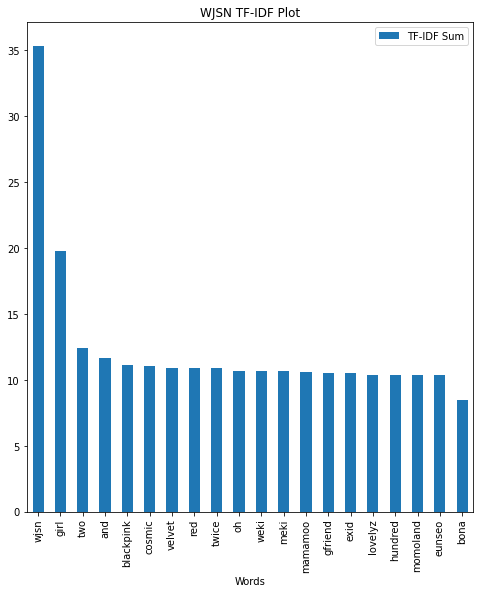

In [52]:
sorted_feature = pd.DataFrame(sorted_feature, columns=["TF-IDF Sum"])
plot = sorted_feature.plot.bar(title="WJSN TF-IDF Plot", figsize=(8, 9));
plot = plot.get_figure()

In [53]:
plot.savefig('wjsn_tf-idf_plot.jpg', dpi=100)

## SENTIMENT ANALYSIS

In [54]:
sentiment_data = tweet_documents

In [55]:
# Getting the polarity and subjectivity of the tweets
positive_tweets = []
negative_tweets = []
tweet_polarity_list = []
polarity_result = []
subjectivity_result = []
subjectivity_analysis = []
for tweet in sentiment_data:
    tweet_polarity = TextBlob(tweet).sentiment.polarity
    tweet_subjectivity = TextBlob(tweet).sentiment.subjectivity
    tweet_polarity_list.append(tweet_polarity)
    subjectivity_result.append(tweet_subjectivity)

In [56]:
for tweet in tweet_polarity_list:
    if tweet == 0.0:
        polarity_result.append('Neutral')
        continue
    elif tweet < 0.0:
        polarity_result.append('Negative')
        continue
    polarity_result.append('Positive')

In [57]:
for tweet in subjectivity_result:
    if tweet > 0.5:
        subjectivity_analysis.append('Subjective')
        continue
    subjectivity_analysis.append('Objective')

In [58]:
sent_analysis = pd.DataFrame({'Polarity Results': tweet_polarity_list,
              'Polarity Analysis': polarity_result,
              'Subjectivity Results': subjectivity_result,
              'Subjectivity Analysis': subjectivity_analysis})
sent_analysis

,Polarity Results,Polarity Analysis,Subjectivity Results,Subjectivity Analysis
0,0.400000,Positive,0.525000,Subjective
1,0.000000,Neutral,0.000000,Objective
2,-0.133333,Negative,0.166667,Objective
3,0.800000,Positive,0.400000,Objective
4,0.400000,Positive,0.100000,Objective
...,...,...,...,...
341,0.700000,Positive,0.600000,Subjective
342,0.700000,Positive,0.900000,Subjective
343,0.416667,Positive,0.583333,Subjective
344,0.000000,Neutral,0.000000,Objective


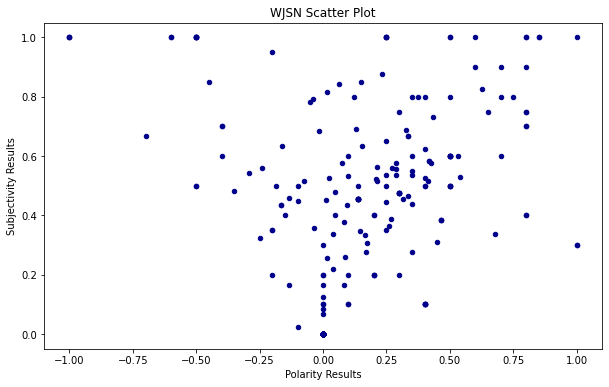

In [59]:
scatter_plot = pd.DataFrame(sent_analysis)
scatter_plot_figure = scatter_plot.plot.scatter(title="WJSN Scatter Plot", x='Polarity Results', y='Subjectivity Results', c='DarkBlue', figsize=(10, 6))
scatter_plot_figure = scatter_plot_figure.get_figure()
scatter_plot_figure.savefig('wjsn_scatter_plot.jpg', dpi=100)

In [60]:
counts_for_polarity = sent_analysis['Polarity Analysis'].value_counts()
counts_for_polarity = pd.DataFrame(counts_for_polarity)
counts_for_polarity['Percent'] = round((counts_for_polarity['Polarity Analysis'] / counts_for_polarity['Polarity Analysis'].sum()) * 100, 1)
counts_for_polarity

,Polarity Analysis,Percent
Neutral,170,49.1
Positive,135,39.0
Negative,41,11.8


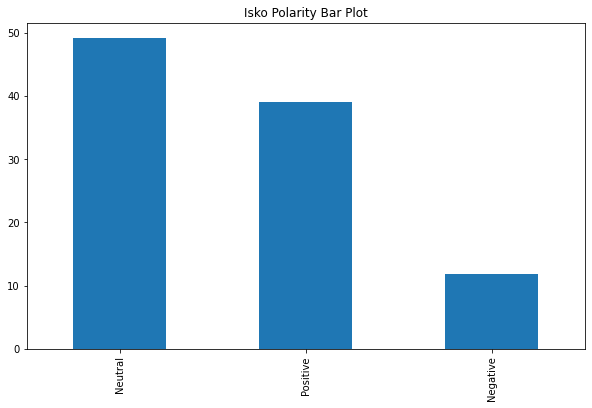

In [61]:
sentiment_analysis_polarity_plot = counts_for_polarity['Percent'].plot.bar(title="Isko Polarity Bar Plot",figsize=(10, 6));
sentiment_analysis_polarity_plot = sentiment_analysis_polarity_plot.get_figure()
sentiment_analysis_polarity_plot.savefig('wjsn_polarity_barplot.jpg', dpi=100)

In [62]:
pd.DataFrame(sent_analysis).to_csv('wjsn_sentimentAnalysisResults.csv')

## EMOTION DETECTION

In [63]:
emotions_detected = []
for tweet in tweet_documents:
    emotions = te.get_emotion(tweet)
    emotions_detected.append(emotions)

In [64]:
emotions_detected = pd.DataFrame(emotions_detected)
emotions_detected

,Happy,Angry,Surprise,Sad,Fear
0,0.0,0.14,0.57,0.00,0.29
1,0.0,1.00,0.00,0.00,0.00
2,0.0,0.00,0.00,0.67,0.33
3,0.0,0.00,0.00,1.00,0.00
4,0.0,1.00,0.00,0.00,0.00
...,...,...,...,...,...
341,0.5,0.00,0.00,0.00,0.50
342,0.2,0.00,0.20,0.20,0.40
343,0.0,0.00,0.00,1.00,0.00
344,0.0,0.00,0.00,0.00,0.00


In [65]:
emotions_transposed = emotions_detected.T
emotions_transposed = emotions_transposed.sum(axis=1)
emotions_transposed

Happy       37.48
Angry       34.23
Surprise    95.44
Sad         52.92
Fear        60.71
dtype: float64

In [66]:
emotions_transposed_plot = pd.DataFrame(emotions_transposed)

In [67]:
emotions_transposed_plot.columns = ['Emotion Value Total']
emotions_transposed_plot

,Emotion Value Total
Happy,37.48
Angry,34.23
Surprise,95.44
Sad,52.92
Fear,60.71


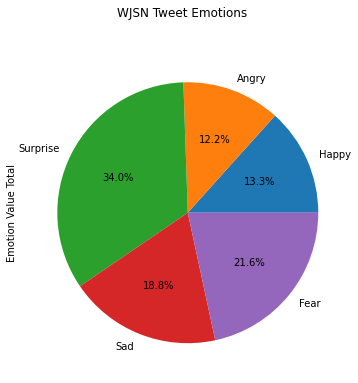

In [68]:
emotions_transposed_plot = emotions_transposed_plot.plot.pie(title="WJSN Tweet Emotions", ylabel=None, legend=None,subplots=True, figsize=(6, 6), autopct='%1.1f%%');

In [69]:
emotions_transposed_plot = emotions_transposed_plot[0].get_figure()
emotions_transposed_plot.savefig('wjsn_emotion_plot.jpg', dpi=100)

In [70]:
df_emotions_detected = pd.DataFrame(emotions_detected).to_csv('wjsn_emotionDetection.csv')